# Chapter 3

### Clustering

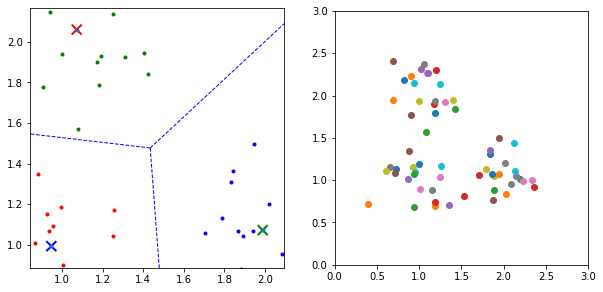

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.linalg import svd
from sklearn.cluster import KMeans

c1 = np.random.multivariate_normal([1, 1], 0.05 * np.eye(2), 20)
c2 = np.random.multivariate_normal([1, 2], 0.05 * np.eye(2), 20)
c3 = np.random.multivariate_normal([2, 1], 0.05 * np.eye(2), 20)

c1 = np.column_stack((c1, c1[:, 1]))
c2 = np.column_stack((c2, c2[:, 1]))
c3 = np.column_stack((c3, c3[:, 1]))

data = np.vstack((c1, c2, c3))

kmeans = KMeans(n_clusters=3, random_state=42).fit(data[:, :2])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

p1, p2, p3 = centers

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis([0, 3, 0, 3])
plt.axis("square")
plt.scatter(c1[:, 0], c1[:, 1], color='r', marker='.')
plt.scatter(c2[:, 0], c2[:, 1], color='g', marker='.')
plt.scatter(c3[:, 0], c3[:, 1], color='b', marker='.')
plt.scatter([p1[0], p2[0], p3[0]], [p1[1], p2[1], p3[1]], color=['r', 'g', 'b'], marker='x', s=100, linewidths=2)

vor = Voronoi([p1, p2, p3])
voronoi_plot_2d(vor, plt.gca(), show_vertices=False, line_colors='b')

data_transformed = data @ np.array([[1, 0, 1], [0, 1, 1], [0, 0, 0]])
plt.subplot(1, 2, 2)
plt.axis([0, 3, 0, 3])
plt.axis("square")

U, S, Vt = svd(data_transformed)
U = U - np.min(U, axis=0)
U = U / np.max(U, axis=0)

for i in range(60):
    plt.scatter(data_transformed[i, 0], data_transformed[i, 1], marker='o')

plt.show()